In [2]:
devtools::unload("rlang")

In [3]:
install.packages("bigrquery")

also installing the dependencies ‘curl’, ‘cli’, ‘tzdb’, ‘vctrs’, ‘cpp11’, ‘httr’, ‘clock’, ‘gargle’, ‘rlang’, ‘rapidjsonr’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
# Restart the Kernel

In [1]:
library(tidyverse)
library(DBI)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
con <- dbConnect(
  bigrquery::bigquery(),
  project = "cal-itp-data-infra" ,
  dataset = "mart_gtfs" #,
#  billing = "billing"
  )

In [3]:
install.packages('DT')

also installing the dependencies ‘lazyeval’, ‘crosstalk’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
library(stringr)
library(DT)

In [6]:
query10251 = "
with cte1 as(
  select distinct gtfs_dataset_key
  from `cal-itp-data-infra.mart_transit_database.dim_gtfs_service_data`
  where customer_facing is true
),
cte2 as(
SELECT 
gtfs_dataset_name Agency,
datetime(_extract_ts, 'America/Los_Angeles') extract_ts_pasific, 
_extract_ts extract_ts,
header_timestamp,
vehicle_timestamp,
_header_message_age HLatency,
_vehicle_message_age VPLatency, 
_vehicle_message_age_vs_header VPHLatency
from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages` vpm
inner join cte1
on vpm.gtfs_dataset_key = cte1.gtfs_dataset_key
where 
gtfs_dataset_name not like 'Bay Area 511%'
and dt between '2024-10-22' and '2024-10-23'
and date(datetime(_extract_ts, 'America/Los_Angeles')) = '2024-10-22'
and _vehicle_message_age is not null
)

select *
from cte2
"
Report10251 = dbGetQuery(con, query10251)


Warning message in gzfile(file, mode):
“cannot open compressed file 'data/Report10251.csv', probable reason 'No such file or directory'”


ERROR: Error in gzfile(file, mode): cannot open the connection


In [14]:
Report10251 %>% 
    saveRDS("Report10251.rds")

In [16]:
Report10251 = readRDS("Report10251.rds")

In [8]:
summary(Report10251)

    Agency          extract_ts_pasific              extract_ts                 
 Length:15837425    Min.   :2024-10-22 00:00:00   Min.   :2024-10-22 07:00:00  
 Class :character   1st Qu.:2024-10-22 08:31:00   1st Qu.:2024-10-22 15:31:00  
 Mode  :character   Median :2024-10-22 13:12:00   Median :2024-10-22 20:12:00  
                    Mean   :2024-10-22 13:00:20   Mean   :2024-10-22 20:00:20  
                    3rd Qu.:2024-10-22 17:36:00   3rd Qu.:2024-10-23 00:36:00  
                    Max.   :2024-10-22 23:59:40   Max.   :2024-10-23 06:59:40  
 header_timestamp              vehicle_timestamp                HLatency      
 Min.   :2024-10-22 06:59:31   Min.   :2024-08-06 14:01:10   Min.   :-22.000  
 1st Qu.:2024-10-22 15:30:57   1st Qu.:2024-10-22 15:29:10   1st Qu.: -1.000  
 Median :2024-10-22 20:12:00   Median :2024-10-22 20:10:00   Median :  1.000  
 Mean   :2024-10-22 20:00:16   Mean   :2024-10-22 19:42:00   Mean   :  3.176  
 3rd Qu.:2024-10-23 00:35:43   3rd Qu.:2024-1

In [9]:
head(Report10251)

Agency                      extract_ts_pasific  extract_ts         
1 San Diego Vehicle Positions 2024-10-22 13:56:20 2024-10-22 20:56:20
2 San Diego Vehicle Positions 2024-10-22 13:56:20 2024-10-22 20:56:20
3 San Diego Vehicle Positions 2024-10-22 13:56:20 2024-10-22 20:56:20
4 San Diego Vehicle Positions 2024-10-22 13:56:20 2024-10-22 20:56:20
5 San Diego Vehicle Positions 2024-10-22 13:56:20 2024-10-22 20:56:20
6 San Diego Vehicle Positions 2024-10-22 13:56:20 2024-10-22 20:56:20
  header_timestamp    vehicle_timestamp   HLatency VPLatency VPHLatency
1 2024-10-22 20:56:21 2024-10-22 20:55:43 -1        37        38       
2 2024-10-22 20:56:21 2024-10-22 20:55:33 -1        47        48       
3 2024-10-22 20:56:21 2024-10-22 20:56:08 -1        12        13       
4 2024-10-22 20:56:21 2024-10-22 20:55:32 -1        48        49       
5 2024-10-22 20:56:21 2024-10-22 20:56:05 -1        15        16       
6 2024-10-22 20:56:21 2024-10-22 20:54:13 -1       127       128

In [10]:
glimpse(Report10251)

Rows: 15,837,425
Columns: 8
$ Agency             <chr> "San Diego Vehicle Positions", "San Diego Vehicle P…
$ extract_ts_pasific <dttm> 2024-10-22 13:56:20, 2024-10-22 13:56:20, 2024-10-…
$ extract_ts         <dttm> 2024-10-22 20:56:20, 2024-10-22 20:56:20, 2024-10-…
$ header_timestamp   <dttm> 2024-10-22 20:56:21, 2024-10-22 20:56:21, 2024-10-…
$ vehicle_timestamp  <dttm> 2024-10-22 20:55:43, 2024-10-22 20:55:33, 2024-10-…
$ HLatency           <int> -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,…
$ VPLatency          <int> 37, 47, 12, 48, 15, 127, 13, 13, 36, 48, 37, 44, 37…
$ VPHLatency         <int> 38, 48, 13, 49, 16, 128, 14, 14, 37, 49, 38, 45, 38…


In [20]:
Report10251 %>% 
    distinct(Agency) %>% 
    datatable(class = 'cell-border stripe', 
          options = list(pageLength = 100, dom = 't'),
          caption = ''
         )


HTML widgets cannot be represented in plain text (need html)

In [25]:
Report10251 %>% 
    mutate(PositiveHLatency = HLatency > 0) %>% 
    group_by(Agency, PositiveHLatency) %>% 
    summarize(number = n())



`summarise()` has grouped output by 'Agency'. You can override using the
`.groups` argument.


Agency                                              PositiveHLatency number
1   Anaheim Resort VehiclePositions                     FALSE             17351
2   Anaheim Resort VehiclePositions                      TRUE             66810
3   Antelope Valley Transit Authority Vehicle Positions FALSE              8416
4   Antelope Valley Transit Authority Vehicle Positions  TRUE             83063
5   Arcadia VehiclePositions                            FALSE              6031
6   Arcadia VehiclePositions                             TRUE              2891
7   B-Line Vehicle Positions                             TRUE             43333
8   Banning Pass Vehicle Positions                      FALSE             17520
9   Banning Pass Vehicle Positions                       TRUE             12096
10  Beach Cities VehiclePositions                       FALSE             17793
11  Bear Vehicle Positions                              FALSE              8738
12  Beaumont Pass Vehicle Positions                     FALSE             11106
13  Beaumont Pass Vehicle Positions                      TRUE              8507
14  Big Blue Bus Clever Vehicle Positions               FALSE             29632
15  Big Blue Bus Clever Vehicle Positions                TRUE            390403
16  BruinBus Vehicle Positions                          FALSE             10610
17  BruinBus Vehicle Positions                           TRUE             23615
18  Burbank VehiclePositions                            FALSE             16734
19  Commerce VehiclePositions                           FALSE             29495
20  Culver City VehiclePositions                        FALSE             60129
21  Culver City VehiclePositions                         TRUE             79384
22  Desert Roadrunner Vehicle Positions                 FALSE             13161
23  Eastern Sierra Vehicle Positions                    FALSE             29394
24  Eastern Sierra Vehicle Positions                     TRUE             19219
25  Elk Grove VehiclePositions                          FALSE             27300
26  Emery Go-Round TripShot Vehicle Positions           FALSE             19392
27  Emery Go-Round TripShot Vehicle Positions            TRUE             23818
28  eTrans VehiclePositions                             FALSE              5183
29  Fresno Vehicle Positions                            FALSE             49970
30  Fresno Vehicle Positions                             TRUE            220812
⋮   ⋮                                                   ⋮                ⋮     
100 SBMTD VehiclePositions                              FALSE              2059
101 SBMTD VehiclePositions                               TRUE            180212
102 SLO Vehicle Positions                               FALSE              4315
103 SLO Vehicle Positions                                TRUE             17546
104 SLORTA VehiclePositions                             FALSE              9505
105 SLORTA VehiclePositions                              TRUE             32768
106 Spirit Bus Passio Vehicle Positions                 FALSE              6256
107 Spirit Bus Passio Vehicle Positions                  TRUE              2889
108 StanRTA Vehicle Positions                           FALSE             11491
109 StanRTA Vehicle Positions                            TRUE            143693
110 SunLine Vehicle Positions                           FALSE              6223
111 SunLine Vehicle Positions                            TRUE             75797
112 Tahoe Transportation District GMV VehiclePositions  FALSE             24165
113 TCRTA Vehicle Positions                             FALSE             25598
114 TCRTA Vehicle Positions                              TRUE             61654
115 Tehama Swiftly Vehicle Position                     FALSE              9803
116 Tehama Swiftly Vehicle Position                      TRUE              5928
117 Torrance Swiftly Vehicle Positions                  FALSE             70488
118 

In [40]:
Report10251 %>% 
    group_by(Agency) %>% 
    summarise(p = sum(HLatency > 0), n = sum(HLatency<= 0)) %>% 
    as_tibble() %>% 
    print(n = Inf)


# A tibble: 78 × 3
   Agency                                                    p       n
   <chr>                                                 <int>   <int>
 1 Anaheim Resort VehiclePositions                       66810   17351
 2 Antelope Valley Transit Authority Vehicle Positions   83063    8416
 3 Arcadia VehiclePositions                               2891    6031
 4 B-Line Vehicle Positions                              43333       0
 5 Banning Pass Vehicle Positions                        12096   17520
 6 Beach Cities VehiclePositions                             0   17793
 7 Bear Vehicle Positions                                    0    8738
 8 Beaumont Pass Vehicle Positions                        8507   11106
 9 Big Blue Bus Clever Vehicle Positions                390403   29632
10 BruinBus Vehicle Positions                            23615   10610
11 Burbank VehiclePositions                                  0   16734
12 Commerce VehiclePositions                              

In [54]:
Report10251 %>% 
    group_by(Agency) %>% 
    summarise(p = sum(HLatency >= 0), n = sum(HLatency < 0), MIN = min(HLatency), MAX = max(HLatency)) %>% 
    as_tibble() %>% 
    datatable(options = list(pageLength = 100, dom = 't'), filter = 'top')


HTML widgets cannot be represented in plain text (need html)

In [55]:
Report10251 %>% 
    group_by(Agency) %>% 
    summarise(p = sum(VPLatency >= 0), n = sum(VPLatency < 0), MIN = min(VPLatency), MAX = max(VPLatency)) %>% 
    as_tibble() %>% 
    datatable(options = list(pageLength = 100, dom = 't'), filter = 'top')


HTML widgets cannot be represented in plain text (need html)

In [49]:
Report10251 %>% 
    filter(Agency == "Big Blue Bus Clever Vehicle Positions",
           HLatency == -3 ) %>%  
    group_by(extract_ts) %>% 
    summarize(N= n())

extract_ts          N  
1 2024-10-22 14:34:00 127
2 2024-10-22 16:32:40 140
3 2024-10-23 01:06:20 129
4 2024-10-23 05:00:40  84
5 2024-10-23 05:03:40  83

In [50]:
Report10251 %>% 
    filter(Agency == "Big Blue Bus Clever Vehicle Positions",
           extract_ts == "2024-10-23 05:03:40" ) 
    group_by(extract_ts) %>% 
    summarize(N= n())

Agency                                extract_ts_pasific 
1  Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
2  Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
3  Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
4  Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
5  Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
6  Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
7  Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
8  Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
9  Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
10 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
11 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
12 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
13 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
14 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
15 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
16 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
17 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
18 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
19 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
20 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
21 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
22 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
23 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
24 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
25 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
26 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
27 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
28 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
29 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
30 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
⋮  ⋮                                     ⋮                  
54 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
55 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
56 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
57 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
58 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
59 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
60 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
61 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
62 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
63 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
64 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
65 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
66 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
67 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
68 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
69 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
70 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
71 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
72 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
73 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
74 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
75 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
76 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
77 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
78 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
79 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
80 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
81 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
82 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
83 Big Blue Bus Clever Vehicle Positions 2024-10-22 22:03:40
   extract_ts          header_timestamp    vehicle_timestamp   HLatency
1  2024-10-23 05:03:40 2024-10-23 05:03:43 2024-10-23 05:03:31 -3      
2  2024-10-23 05:03:40 2024-10-23 05:03:43 2024-10-23 04:57:44 -3      
3  20

ERROR: Error in group_by(extract_ts): object 'extract_ts' not found


In [6]:
Report10251 = readRDS("Report10251.rds")

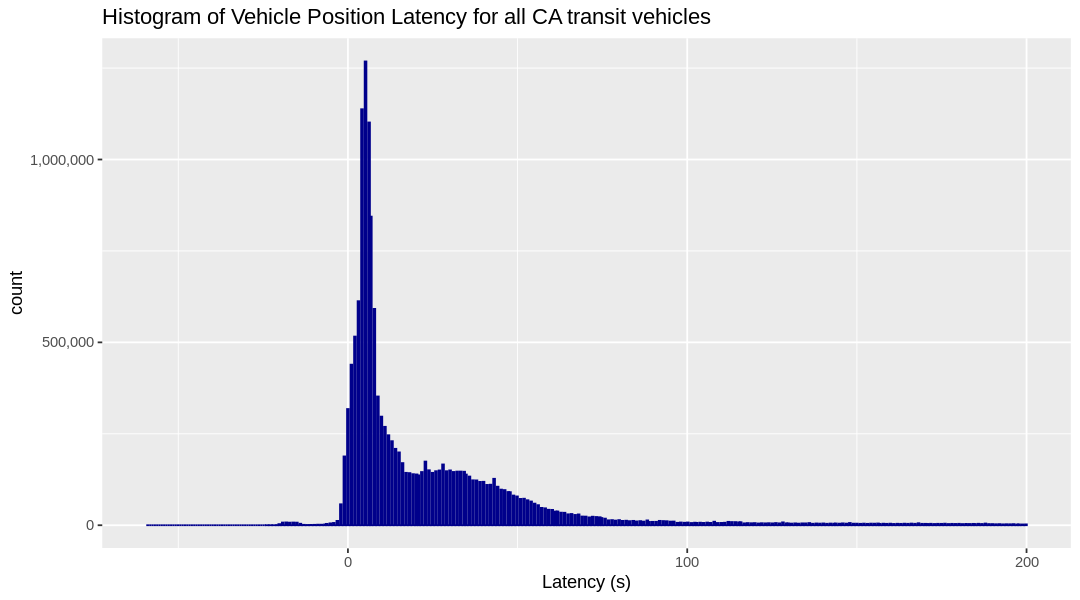

In [8]:
options(repr.plot.width = 9, repr.plot.height =5) 
Report10251 %>% 
    filter(VPLatency <= 200) %>% 
    ggplot(aes(VPLatency)) +
    geom_histogram(bins = 500, color = 'darkblue') +
    ggtitle("Histogram of Vehicle Position Latency for all CA transit vehicles") +
    xlab("Latency (s)") +
    scale_y_continuous(labels = scales::comma) 
              

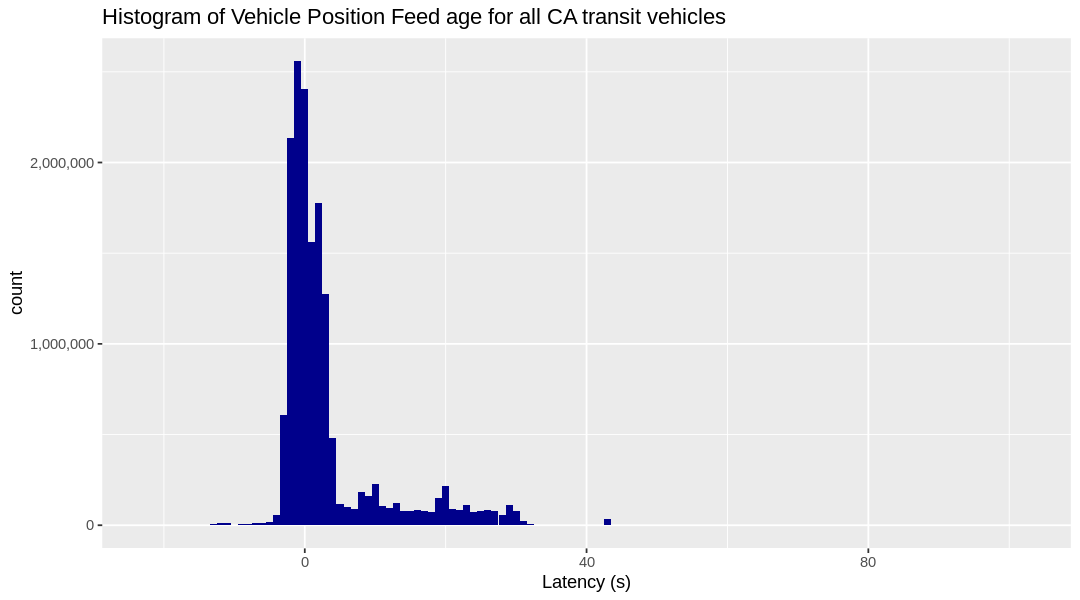

In [15]:
options(repr.plot.width = 9, repr.plot.height =5) 
Report10251 %>% 
    # filter(Latency <= 150) %>% 
    ggplot(aes(HLatency)) +
    geom_histogram(binwidth = 1, fill = 'darkblue') +
    ggtitle("Histogram of Vehicle Position Feed age for all CA transit vehicles") +
    xlab("Latency (s)") +
    scale_y_continuous(labels = scales::comma) 
              

### Distincting the Header

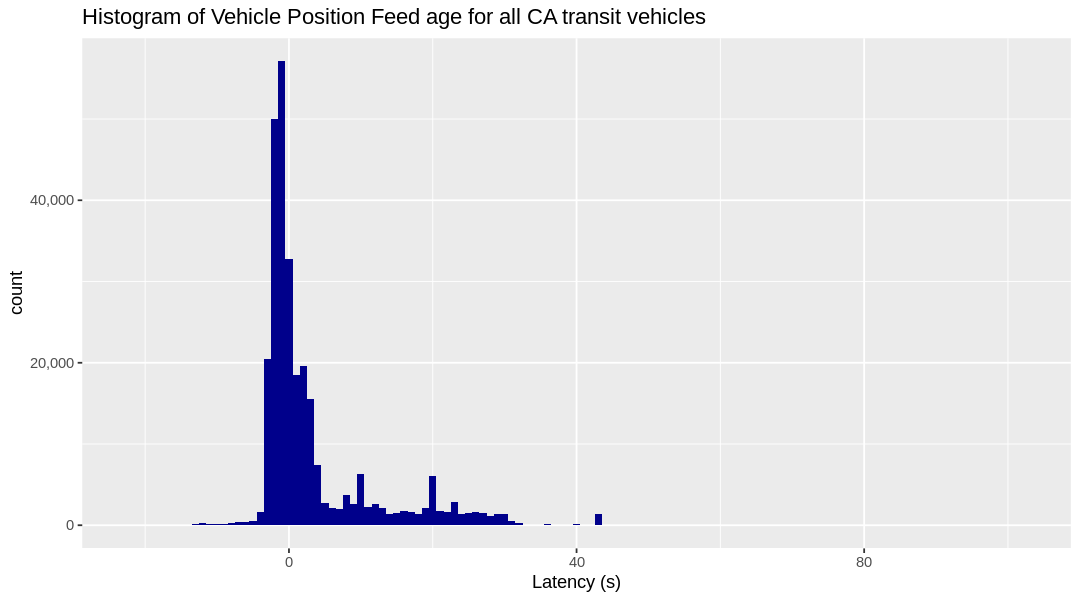

In [153]:
options(repr.plot.width = 9, repr.plot.height =5) 
Report10251 %>%
    distinct(Agency, header_timestamp, HLatency) %>% 
    ggplot(aes(HLatency)) +
    geom_histogram(binwidth = 1, fill = 'darkblue') +
    ggtitle("Histogram of Vehicle Position Feed age for all CA transit vehicles") +
    xlab("Latency (s)") +
    scale_y_continuous(labels = scales::comma) 


In [156]:
Report10251 %>%
    distinct(Agency, header_timestamp, HLatency) %>% 
    summary()

    Agency          header_timestamp                 HLatency      
 Length:286876      Min.   :2024-10-22 06:59:31   Min.   :-22.000  
 Class :character   1st Qu.:2024-10-22 14:46:23   1st Qu.: -2.000  
 Mode  :character   Median :2024-10-22 19:54:40   Median :  0.000  
                    Mean   :2024-10-22 19:46:16   Mean   :  3.253  
                    3rd Qu.:2024-10-23 01:02:20   3rd Qu.:  3.000  
                    Max.   :2024-10-23 06:59:43   Max.   :102.000  

In [16]:
ReportS = Report10251 %>%
    group_by(Agency) %>% 
    summarize(Min = min(VPLatency), 
              `%25` = quantile(VPLatency, .25),
              Median = median(VPLatency), 
              Average = round(mean(VPLatency), 1),
              `%75` = quantile(VPLatency, .75),
              Max = max(VPLatency),
             )
ReportS %>%     
    datatable(class = 'cell-border stripe', 
              options = list(pageLength = 100, dom = 't'),
              caption = 'Vehicle Position Message Statistics by Transit Agency'
             )


HTML widgets cannot be represented in plain text (need html)

In [17]:
ReportS$Agency= ReportS$Agency %>% str_replace(" Vehicle Positions", "")
ReportS$Agency= ReportS$Agency %>% str_replace(" Vehicle Position", "")
ReportS$Agency= ReportS$Agency %>% str_replace(" VehiclePositions", "")
ReportS$Agency= ReportS$Agency %>% str_replace(" VehiclePosition", "")
ReportS %>% 
    datatable(class = 'cell-border stripe', 
              options = list(pageLength = 100, dom = 't'),
              caption = 'Vehicle Position Message Statistics by Transit Agency'
             )


HTML widgets cannot be represented in plain text (need html)

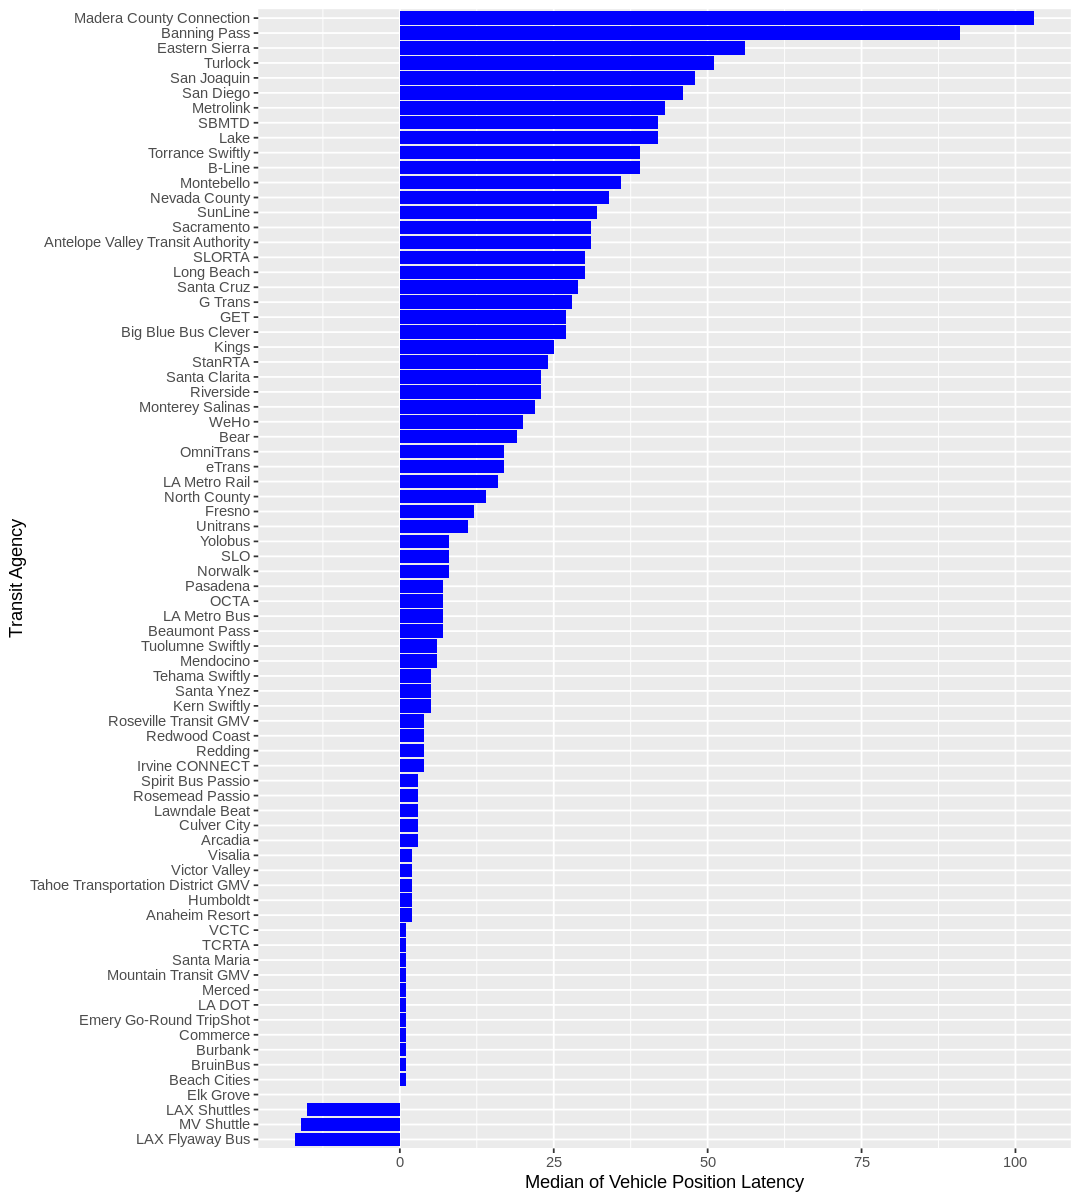

In [20]:
options(repr.plot.width = 9, repr.plot.height =10) 
ReportS %>% 
    filter(
        Median < 1000,
        # Median > 0
        ) %>% 
    ggplot(aes(reorder(Agency, Median), Median)) +
    geom_bar(stat = 'identity', fill = "blue") +
    xlab("Transit Agency") +
    ylab("Median of Vehicle Position Latency") +
    # theme(axis.text.x = element_text(angle = 90)) +
    coord_flip()


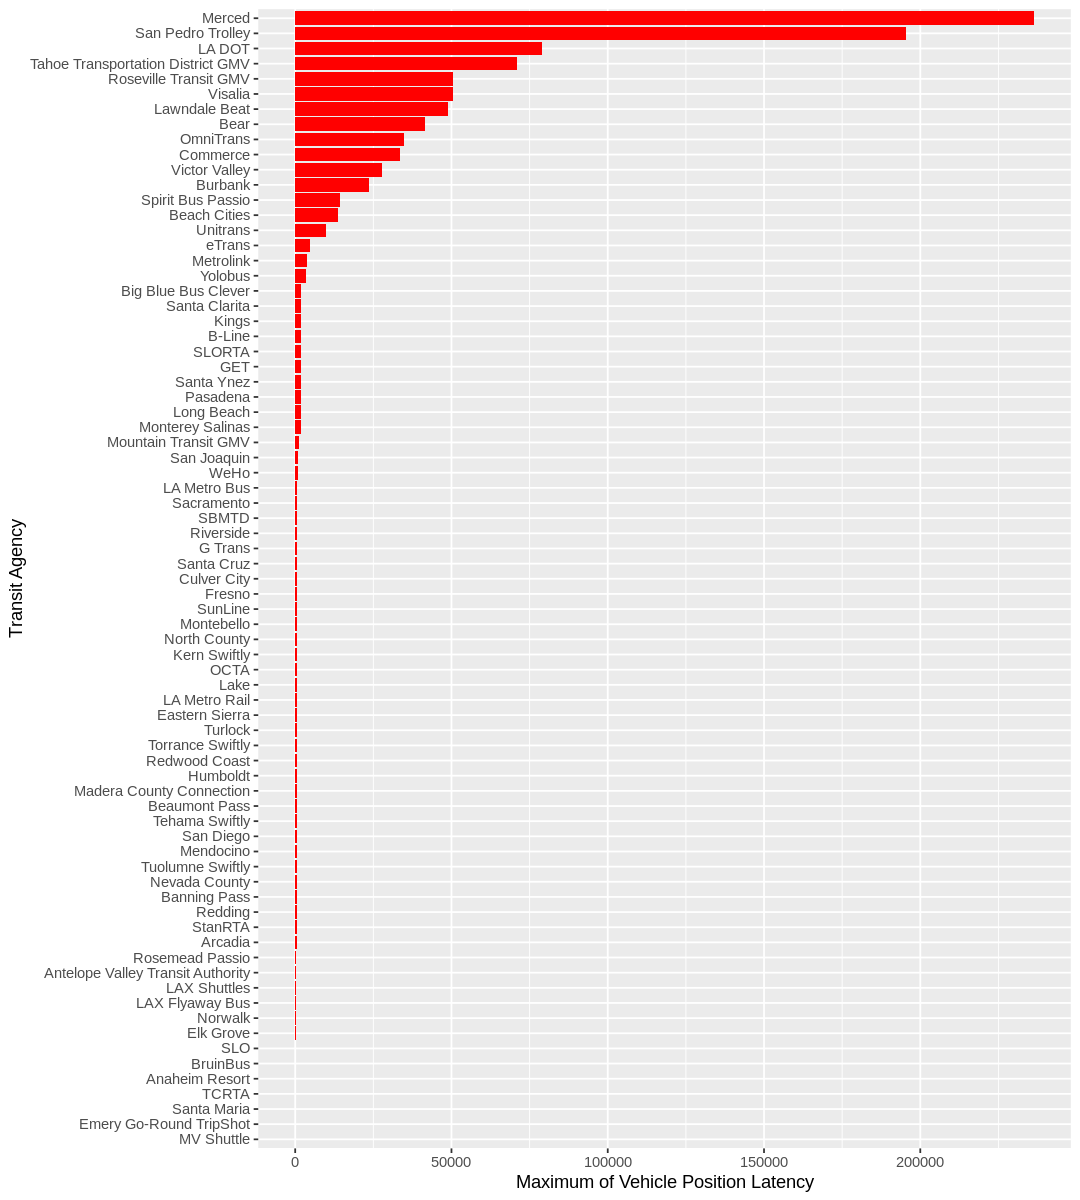

In [24]:
ReportS %>% 
    filter(
        Max < 1000000,
        # Max > 10
        ) %>% 
    ggplot(aes(reorder(Agency, Max), Max)) +
    geom_bar(stat = 'identity', fill = "red") +
    xlab("Transit Agency") +
    ylab("Maximum of Vehicle Position Latency") +
    # theme(axis.text.x = element_text(angle = 90)) +
    coord_flip()


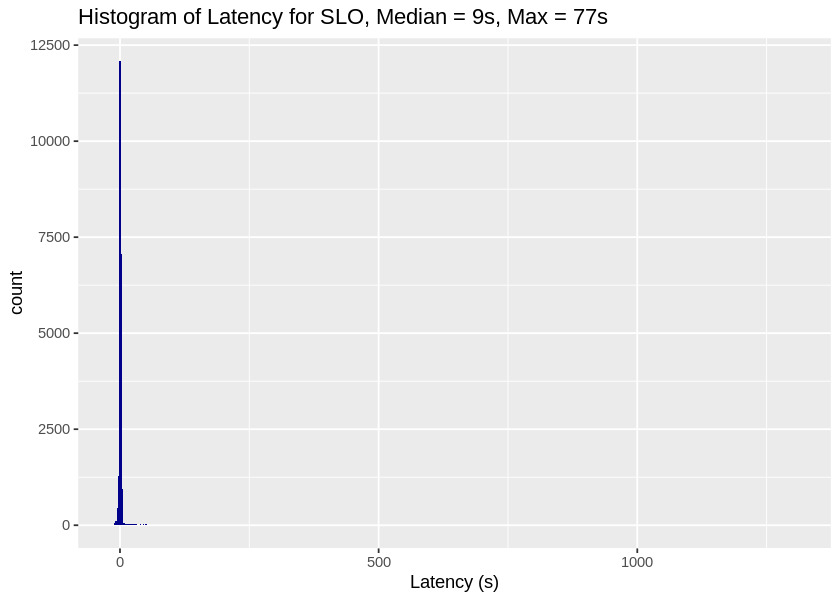

In [32]:
options(repr.plot.width = 7, repr.plot.height =5) 
Report10251 %>% 
    filter(Agency == "Mountain Transit GMV VehiclePositions") %>% 
    # filter(Latency <= 400) %>% 
    ggplot(aes(VPLatency)) +
    geom_histogram(bins = 500, fill = 'darkblue') +
    ggtitle("Histogram of Latency for SLO, Median = 9s, Max = 77s") +
    xlab("Latency (s)") 
              

In [27]:
ReportS

Agency                            Min    %25      Median   Average  %75     
1  Anaheim Resort                     -2     1           2         2.2       4 
2  Antelope Valley Transit Authority  -3    21          31        32.1      41 
3  Arcadia                            -3     1           3        17.1       7 
4  B-Line                              7    29          39        45.0      51 
5  Banning Pass                       -2    11          91       112.8     198 
6  Beach Cities                      -14     0           1       290.7       2 
7  Bear                               -2     9          19       167.8      38 
8  Beaumont Pass                      -2     4           7        13.9       9 
9  Big Blue Bus Clever                 0    18          27       102.3      35 
10 BruinBus                           -3     0           1         1.4       3 
11 Burbank                           -12     0           1       857.8       2 
12 Commerce                          -16     0           1      2246.8       3 
13 Culver City                        -3     2           3        13.4       5 
14 Desert Roadrunner                 -16     3       37799    374575.7 1093766 
15 Eastern Sierra                     -6     8          56       106.9     186 
16 Elk Grove                         -14    -1           0         0.5       2 
17 Emery Go-Round TripShot            -3     0           1         0.7       2 
18 eTrans                             -2     7          17       117.9      29 
19 Fresno                             -2     7          12        12.0      16 
20 G Trans                            -2    19          28        39.0      37 
21 GET                                 2    16          27        46.9      50 
22 Humboldt                          -59     1           2         9.7       4 
23 Irvine CONNECT                     -3     1           4     68298.8       7 
24 Kern Swiftly                       -4     3           5        18.8       9 
25 Kings                               2    14          25        43.9      48 
26 LA DOT                            -19     0           1       174.9       2 
27 LA Metro Bus                       -1     5           7        31.0      24 
28 LA Metro Rail                      -1     9          16        44.8      35 
29 Lake                               -3     8          42        93.5     166 
30 Lawndale Beat                     -14     1           3     11335.0   22494 
⋮  ⋮                                 ⋮      ⋮        ⋮        ⋮        ⋮       
49 Redwood Coast                         -5      3.0      4.0     18.4      7.0
50 Riverside                             -2     15.0     23.0     37.1     31.0
51 Rosemead Passio                       -3      1.0      3.0     12.2      7.0
52 Roseville Transit GMV                -13      1.0      4.0   2537.0     11.0
53 Sacramento                             0     22.0     31.0     48.2     40.0
54 San Diego                              6     37.0     46.0     58.2     55.0
55 San Joaquin                            1     32.0     48.0     61.4     70.0
56 San Pedro Trolley                 108921 130560.8 152330.5 152271.9 173920.2
57 Santa Clarita                          1     13.0     23.0     41.8     35.0
58 Santa Cruz                            -2     19.0     29.0     36.8     38.0
59 Santa Maria                           -3      0.0      1.0      1.2      2.0
60 Santa Ynez                            -2      3.0      5.0    187.7     23.0
61 SBMTD                                 -1     28.0     42.0     60.2     61.0
62 SLO                                    0      4.0      8.0      7.9     12.0
63 SLORTA                                 1     17.0     30.0     69.5     63.0
64 Spirit Bus Passio                     -3      1.0      3.0    127.5      6.0
65 StanRTA                               -1     16.0     24.0     23.7     31.0
66 SunLine                               -2     23.0     32.0     33.6     42.0
67 

# Vendors

In [33]:
query10271 = "
with 
cte1 as(
  select distinct gtfs_dataset_key
  from `cal-itp-data-infra.mart_transit_database.dim_gtfs_service_data`
  where customer_facing is true
),
cte2 as(
SELECT 
  vpm.gtfs_dataset_key,
  gtfs_dataset_name Agency,
  datetime(_extract_ts, 'America/Los_Angeles') extract_ts_pasific, 
  _header_message_age HLatency,
  _vehicle_message_age VPLatency, 
from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages` vpm
inner join cte1
on vpm.gtfs_dataset_key = cte1.gtfs_dataset_key
where gtfs_dataset_name not like 'Bay Area 511%'
and dt between '2024-10-22' and '2024-10-23'
and date(datetime(_extract_ts, 'America/Los_Angeles')) = '2024-10-22'
and _vehicle_message_age is not null
),
cte3 as(
select  
  organization_name Vendor,
  Agency,
  extract_ts_pasific, 
  HLatency,
  VPLatency, 
from cte2 
inner join `cal-itp-data-infra.mart_transit_database.bridge_organizations_x_gtfs_datasets_produced` bo
on cte2.gtfs_dataset_key = bo.gtfs_dataset_key
and '2024-10-22' between date(datetime(_valid_from, 'America/Los_Angeles')) and date(datetime(_valid_to, 'America/Los_Angeles'))
)

select * from cte3 
"
Report10271 = dbGetQuery(con, query10271)
Report10271 %>% 
    saveRDS("Report10271.rds")

In [35]:
glimpse(Report10271)

Rows: 15,920,151
Columns: 5
$ Vendor             <chr> "Swiftly Inc.", "Swiftly Inc.", "Swiftly Inc.", "Sw…
$ Agency             <chr> "LA Metro Rail Vehicle Positions", "LA Metro Rail V…
$ extract_ts_pasific <dttm> 2024-10-22 16:00:00, 2024-10-22 16:00:00, 2024-10-…
$ HLatency           <int> -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -2,…
$ VPLatency          <int> 10, 38, 14, 3, 9, 9, 9, 3, 9, 80, 2, 44, 2, 44, 2, …


In [38]:
Vendors = c(
    "Avail Technologies Inc.",
    "Cal-ITP",
    "Clever Devices Ltd.",
    "Connexionz Inc.",
    "Cubic",
    "GMV Syncromatics Inc",
    "Passio Technologies",
    "Swiftly Inc.",
    "TransLoc",
    "TripShot Inc.",
    "TripSpark"
    )


In [65]:
Report27S = Report10271 %>%
    mutate(Vendor = str_replace(Vendor, "California Integrated Travel Project", "Cal-ITP"))  %>%
    filter(Vendor %in% Vendors) %>% 
    group_by(Vendor) %>% 
    summarize(Min = min(VPLatency), 
              `%25` = quantile(VPLatency, .25),
              Median = median(VPLatency), 
              `%75` = quantile(VPLatency, .75),
              `%90` = quantile(VPLatency, .90),
              `%95` = quantile(VPLatency, .95),
              Max = max(VPLatency),
             )
Report27S %>%     
    datatable(class = 'cell-border stripe', 
              options = list(pageLength = 100, dom = 't'),
              caption = 'Vehicle Position Message Latency Statistics by Vendors', rownames = FALSE
             )


HTML widgets cannot be represented in plain text (need html)

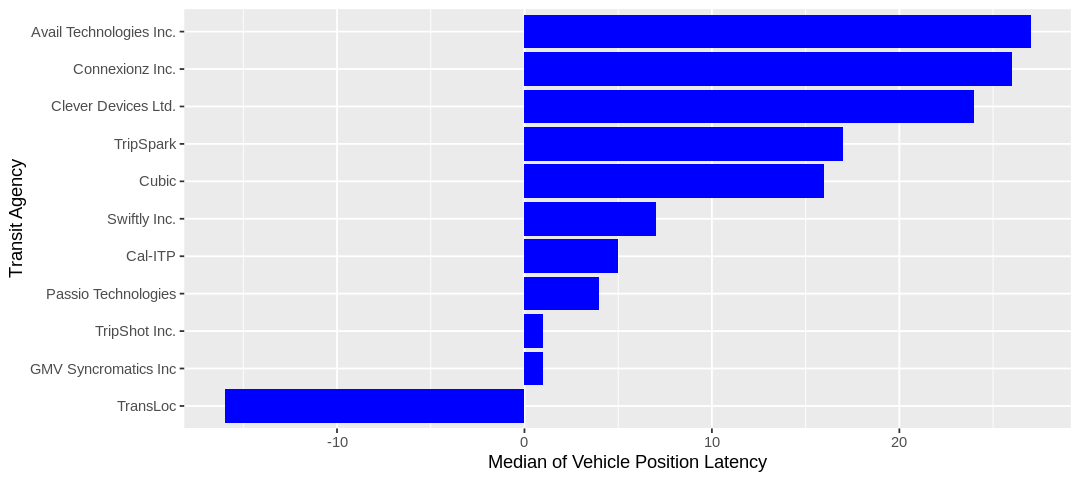

In [58]:
options(repr.plot.width = 9, repr.plot.height =4) 
Report27S %>% 
    # filter(
    #     Median < 1000,
    #     # Median > 0
    #     ) %>% 
    ggplot(aes(reorder(Vendor, Median), Median)) +
    geom_bar(stat = 'identity', fill = "blue") +
    xlab("Transit Agency") +
    ylab("Median of Vehicle Position Latency") +
    # theme(axis.text.x = element_text(angle = 90)) +
    coord_flip()


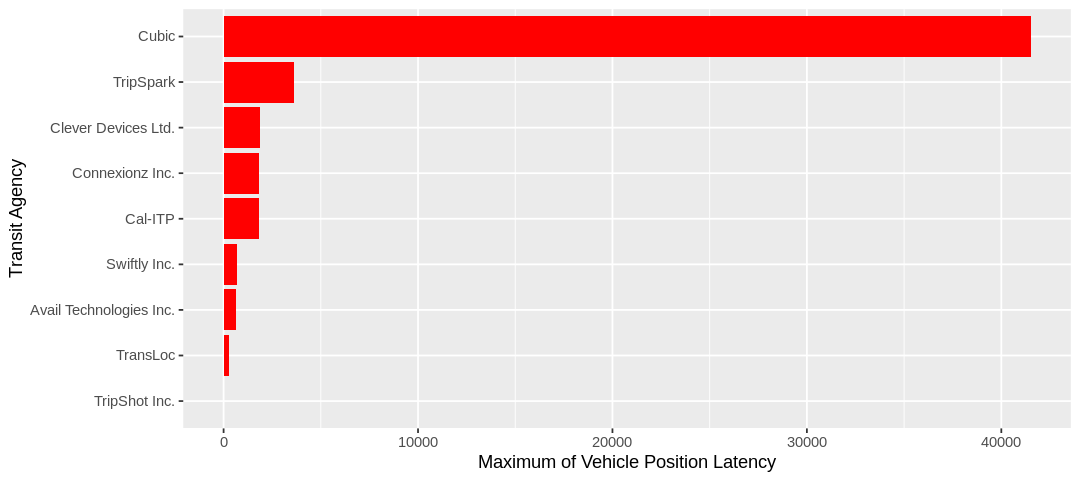

In [59]:
Report27S %>% 
    filter(
        Max < 100000,
        # Max > 10
        ) %>% 
    ggplot(aes(reorder(Vendor, Max), Max)) +
    geom_bar(stat = 'identity', fill = "red") +
    xlab("Transit Agency") +
    ylab("Maximum of Vehicle Position Latency") +
    # theme(axis.text.x = element_text(angle = 90)) +
    coord_flip()


In [66]:
Report27SH = Report10271 %>%
    mutate(Vendor = str_replace(Vendor, "California Integrated Travel Project", "Cal-ITP"))  %>%
    filter(Vendor %in% Vendors) %>% 
    group_by(Vendor) %>% 
    summarize(Min = min(VPLatency), 
              `%25` = quantile(HLatency, .25),
              Median = median(HLatency), 
              `%75` = quantile(HLatency, .75),
              `%95` = quantile(HLatency, .95),
              Max = max(HLatency),
             )
Report27SH %>%     
    datatable(class = 'cell-border stripe', 
              options = list(pageLength = 100, dom = 't'),
              caption = 'Vehicle Position Feed Latency Statistics by Vendors', rownames = FALSE
             )


HTML widgets cannot be represented in plain text (need html)

### Including distinct in header latency calculation

In [155]:
Report27SH = Report10271 %>%
    mutate(Vendor = str_replace(Vendor, "California Integrated Travel Project", "Cal-ITP"))  %>%
    filter(Vendor %in% Vendors) %>%
    distinct(Vendor, extract_ts_pasific, HLatency) %>% 
    group_by(Vendor) %>% 
    summarize(Min = min(HLatency), 
              `%25` = quantile(HLatency, .25),
              Median = median(HLatency), 
              `%75` = quantile(HLatency, .75),
              `%95` = quantile(HLatency, .95),
              Max = max(HLatency),
             )
Report27SH %>%     
    datatable(class = 'cell-border stripe', 
              options = list(pageLength = 100, dom = 't'),
              caption = 'Vehicle Position Feed Latency Statistics by Vendors', rownames = FALSE
             )


HTML widgets cannot be represented in plain text (need html)

## The issue with extreme values of vehicle positions

In [88]:
query10272 = "
with 
cte1 as(
  select distinct gtfs_dataset_key
  from `cal-itp-data-infra.mart_transit_database.dim_gtfs_service_data`
  where customer_facing is true
),
cte2 as(
SELECT 
  vpm.gtfs_dataset_key,
  gtfs_dataset_name Agency,
  datetime(_extract_ts, 'America/Los_Angeles') extract_ts_pasific, 
  _header_message_age HLatency,
  _vehicle_message_age VPLatency,
  vehicle_label,
  vehicle_id,
  position_latitude,
  position_longitude,
  trip_id
from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages` vpm
inner join cte1
on vpm.gtfs_dataset_key = cte1.gtfs_dataset_key
where gtfs_dataset_name not like 'Bay Area 511%'
and dt between '2024-10-22' and '2024-10-23'
and date(datetime(_extract_ts, 'America/Los_Angeles')) = '2024-10-22'
and _vehicle_message_age is not null
),
cte3 as(
select  
  organization_name Vendor,
  Agency,
  extract_ts_pasific, 
  HLatency,
  VPLatency,
  vehicle_label,
  vehicle_id,
  position_latitude,
  position_longitude,
  trip_id
from cte2 
inner join `cal-itp-data-infra.mart_transit_database.bridge_organizations_x_gtfs_datasets_produced` bo
on cte2.gtfs_dataset_key = bo.gtfs_dataset_key
and '2024-10-22' between date(datetime(_valid_from, 'America/Los_Angeles')) and date(datetime(_valid_to, 'America/Los_Angeles'))
)

select * from cte3 
"
Report10272 = dbGetQuery(con, query10272)
Report10272 %>% 
    saveRDS("Report10272.rds")

In [72]:
Report10272 %>% 
    filter(Agency == "Santa Clarita VehiclePositions",
           Vendor == "Connexionz Inc.") %>%
    arrange(desc(VPLatency))


Vendor          Agency                         extract_ts_pasific 
1     Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:26:20
2     Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 14:12:20
3     Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 13:38:20
4     Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:26:00
5     Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 15:58:20
6     Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 14:12:00
7     Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 16:46:20
8     Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 13:45:20
9     Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 06:59:20
10    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 13:34:40
11    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 13:38:00
12    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 10:43:40
13    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 14:16:40
14    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:25:40
15    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 15:58:00
16    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 16:46:00
17    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 14:11:40
18    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 13:45:00
19    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 06:59:00
20    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 13:34:20
21    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 13:37:40
22    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 10:43:20
23    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 14:16:20
24    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:25:20
25    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 15:57:40
26    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 16:45:40
27    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 14:11:20
28    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 13:44:40
29    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 06:58:40
30    Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 13:34:00
⋮     ⋮               ⋮                              ⋮                  
82697 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 17:32:00
82698 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 14:09:00
82699 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 14:16:00
82700 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 14:19:00
82701 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 15:18:00
82702 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 15:40:00
82703 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 05:58:00
82704 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 21:51:00
82705 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 09:11:00
82706 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 09:27:00
82707 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 08:05:00
82708 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 08:36:00
82709 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 11:15:00
82710 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 20:37:00
82711 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 20:48:00
82712 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 10:07:00
82713 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 10:37:00
82714 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 18:02:00
82715 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 18:06:00
82716 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 18:37:00
82717 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 18:55:00
82718 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 18:58:00
82719 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 

In [92]:
Report10272 %>% 
    filter(Agency == "Santa Clarita VehiclePositions",
           Vendor == "Connexionz Inc.",
           vehicle_label == "282",
           !is.na(trip_id) 
           # , extract_ts_pasific > "2024-10-22 06:56:00"
          ) %>%
    arrange(desc(extract_ts_pasific)) #%>% 
    # as_tibble() %>% 
    # print(n = Inf)



Vendor          Agency                         extract_ts_pasific  HLatency
1   Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:26:20 20      
2   Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:26:00  0      
3   Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:25:40 10      
4   Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:25:20 20      
5   Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:25:00  0      
6   Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:24:40 10      
7   Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:24:20 20      
8   Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:24:00  0      
9   Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:23:40 10      
10  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:23:20 20      
11  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:23:00  0      
12  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:22:40 10      
13  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:22:20 20      
14  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:22:00  0      
15  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:21:40 10      
16  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:21:20 20      
17  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:21:00  0      
18  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:20:40 10      
19  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:20:20 20      
20  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:20:00 30      
21  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:19:40 10      
22  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:19:20 20      
23  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:19:00  0      
24  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:18:40 10      
25  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:18:20 20      
26  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:18:00  0      
27  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:17:40 10      
28  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:17:20 20      
29  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:17:00  0      
30  Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 07:16:40 10      
⋮   ⋮               ⋮                              ⋮                   ⋮       
343 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 05:32:20 20      
344 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 05:32:00  0      
345 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 05:31:40 10      
346 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 05:31:20 20      
347 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 05:31:00  0      
348 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 05:30:40 10      
349 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 05:30:20 20      
350 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 05:30:00  0      
351 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 05:29:40 10      
352 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 05:29:20 20      
353 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 05:29:00  0      
354 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 05:28:40 10      
355 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 05:28:20 20      
356 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 05:28:00  0      
357 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 05:27:40 10      
358 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 05:27:20 20      
359 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 05:27:00  0      
360 Connexionz Inc. Santa Clarita VehiclePositions 2024-10-22 05:26:40 10      
361 

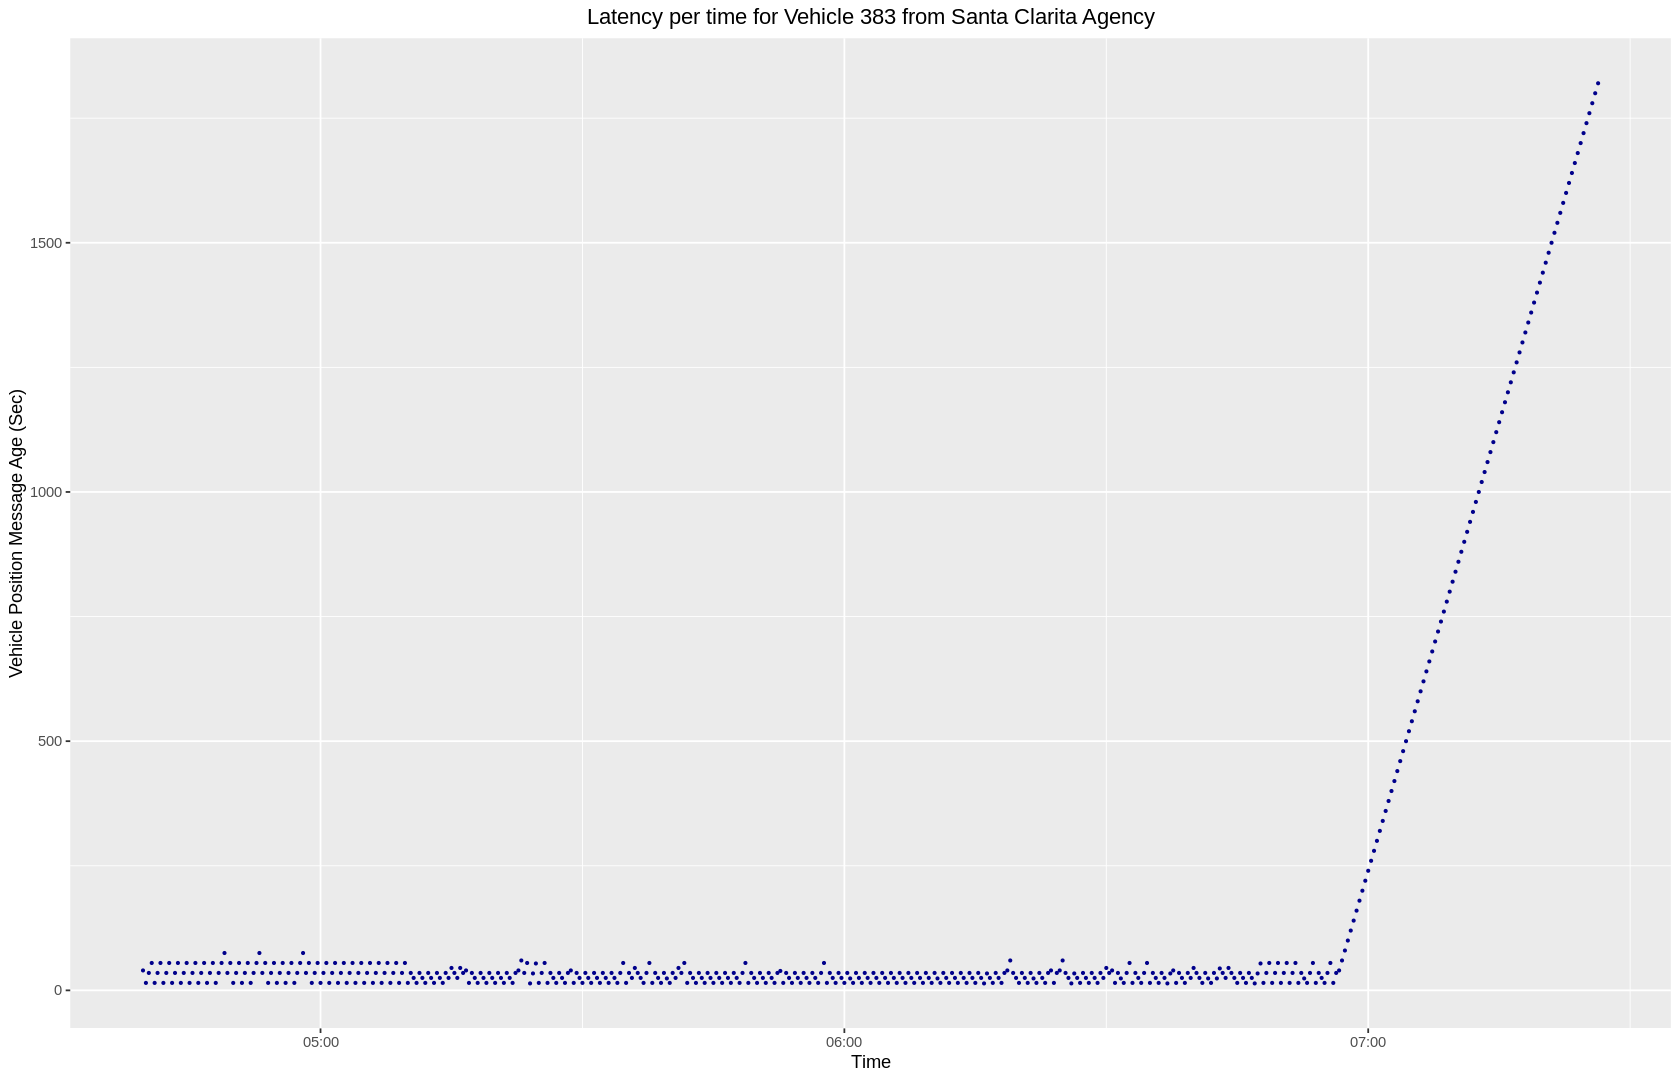

In [85]:
options(repr.plot.width = 14, repr.plot.height =9) 
Report10272 %>% 
    filter(Agency == "Santa Clarita VehiclePositions",
           Vendor == "Connexionz Inc.",
           vehicle_label == "282") %>%
    ggplot(aes(extract_ts_pasific, VPLatency)) +
    geom_point(size = .5, color = "darkblue") +
    xlab("Time") +
    ylab("Vehicle Position Message Age (Sec)") +
    ggtitle("Latency per time for Vehicle 383 from Santa Clarita Agency") +
    theme(plot.title = element_text(hjust = 0.5)) 


In [109]:
Report10272 %>% 
    filter(Agency == "Santa Clarita VehiclePositions",
           Vendor == "Connexionz Inc.",
           vehicle_label == "282") %>%
    arrange(desc(extract_ts_pasific)) %>% 
    mutate(`On Trip` = !is.na(trip_id),
           location = position_latitude + position_longitude, 
           location1 = lead(location, default = last(location)),
           Stationary = location == location1) %>% 
    datatable(class = 'cell-border stripe', 
              options = list(pageLength = 98, dom = 'tp'),
              caption = 'Vehicle Position Feed Latency Statistics by Vendors', rownames = TRUE
             )



HTML widgets cannot be represented in plain text (need html)

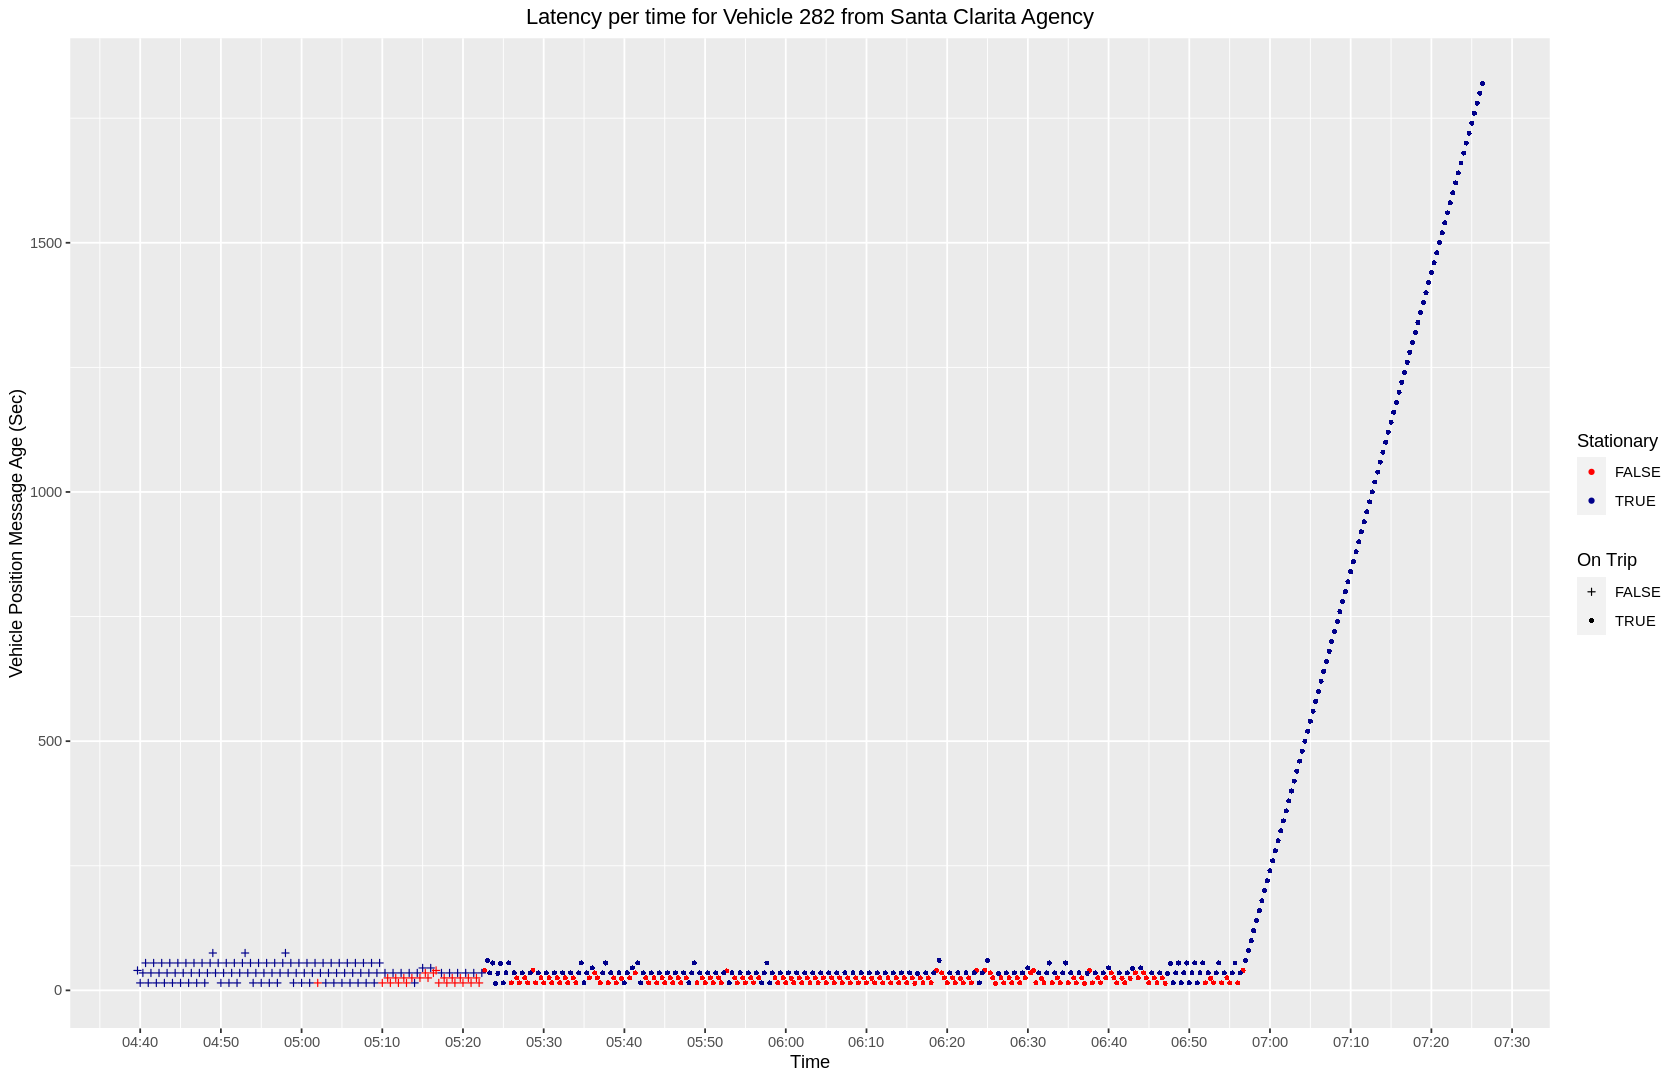

In [144]:
Report10272 %>% 
    filter(Agency == "Santa Clarita VehiclePositions",
           Vendor == "Connexionz Inc.",
           vehicle_label == "282") %>%
    arrange(desc(extract_ts_pasific)) %>% 
    mutate(`On Trip` = !is.na(trip_id),
           location = position_latitude + position_longitude, 
           location1 = lead(location, default = last(location)),
           Stationary = location == location1) %>% 
    ggplot(aes(extract_ts_pasific, VPLatency)) +
    geom_point(size = 1.1, aes(color = Stationary, shape = `On Trip`)) +
    xlab("Time") +
    ylab("Vehicle Position Message Age (Sec)") +
    ggtitle("Latency per time for Vehicle 282 from Santa Clarita Agency") +
    theme(plot.title = element_text(hjust = 0.5)) +
    scale_color_manual(values = c("red", "darkblue")) +
    scale_shape_manual(values = c(3, 16)) +
    scale_x_datetime( breaks = date_breaks("10 min"), 
                    labels = date_format("%H:%M", 
                                         # tz="CET"
                                        ), 
                    # expand = c(0,0)
                    )



In [135]:
santaClaritaDistinct = dbGetQuery(con,
"
with cte1 as(    
    SELECT *, first_value(_extract_ts) over(
      partition by 
        gtfs_dataset_key,
        dt,
        -- hour,
        base64_url,
        -- _extract_ts,
        -- _config_extract_ts,
        gtfs_dataset_name,
        schedule_gtfs_dataset_key,
        schedule_base64_url,
        schedule_name,
        schedule_feed_key,
        schedule_feed_timezone,
        -- COALESCE(
        --     trip_start_date,
        --     DATE(header_timestamp, schedule_feed_timezone),
        --     DATE(_extract_ts, schedule_feed_timezone)) AS service_date,

        -- TIMESTAMP_DIFF(_extract_ts, header_timestamp, SECOND) AS _header_message_age,
        -- TIMESTAMP_DIFF(_extract_ts, vehicle_timestamp, SECOND) AS _vehicle_message_age,
        -- TIMESTAMP_DIFF(header_timestamp, vehicle_timestamp, SECOND) AS _vehicle_message_age_vs_header,


        header_timestamp,
        header_version,
        header_incrementality,

        id,

        current_stop_sequence,
        stop_id,
        current_status,
        vehicle_timestamp,
        congestion_level,
        occupancy_status,
        occupancy_percentage,

        vehicle_id,
        vehicle_label,
        vehicle_license_plate,
        vehicle_wheelchair_accessible,

        trip_id,
        trip_route_id,
        trip_direction_id,
        trip_start_time,
        trip_start_time_interval,
        trip_start_date,
        trip_schedule_relationship,

        cast(position_latitude as string),
        cast(position_longitude as string),
        cast(position_bearing as string),
        cast(position_odometer as string),
        cast(position_speed as string)
      order by _extract_ts
    ) as new_extract_ts
    FROM`cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages`
    where dt between '2024-10-22' and '2024-10-23'
and date(datetime(_extract_ts, 'America/Los_Angeles')) = '2024-10-22'
and gtfs_dataset_name = 'Santa Clarita VehiclePositions'
and vehicle_label = '282'
), 
cte2 as(
select distinct 
        gtfs_dataset_key,
        dt,
        -- hour,
        base64_url,
        new_extract_ts,
        -- _config_extract_ts,
        gtfs_dataset_name,
        schedule_gtfs_dataset_key,
        schedule_base64_url,
        schedule_name,
        schedule_feed_key,
        schedule_feed_timezone,
        COALESCE(
            trip_start_date,
            DATE(header_timestamp, schedule_feed_timezone),
            DATE(new_extract_ts, schedule_feed_timezone)) AS service_date,

        TIMESTAMP_DIFF(new_extract_ts, header_timestamp, SECOND) AS _header_message_age,
        TIMESTAMP_DIFF(new_extract_ts, vehicle_timestamp, SECOND) AS _vehicle_message_age,
        TIMESTAMP_DIFF(header_timestamp, vehicle_timestamp, SECOND) AS _vehicle_message_age_vs_header,


        header_timestamp,
        header_version,
        header_incrementality,

        id,

        current_stop_sequence,
        stop_id,
        current_status,
        vehicle_timestamp,
        congestion_level,
        occupancy_status,
        occupancy_percentage,

        vehicle_id,
        vehicle_label,
        vehicle_license_plate,
        vehicle_wheelchair_accessible,

        trip_id,
        trip_route_id,
        trip_direction_id,
        trip_start_time,
        trip_start_time_interval,
        trip_start_date,
        trip_schedule_relationship,

        position_latitude,
        position_longitude,
        position_bearing,
        position_odometer,
        position_speed
from cte1
)
select
  gtfs_dataset_name Agency,
  datetime(new_extract_ts, 'America/Los_Angeles') extract_ts_pasific, 
  _header_message_age HLatency,
  _vehicle_message_age VPLatency,
  vehicle_label,
  vehicle_id,
  position_latitude,
  position_longitude,
  trip_id
from cte2
"
                                 )

In [137]:
santaClaritaDistinct %>% 
    # filter(Agency == "Santa Clarita VehiclePositions",
    #        Vendor == "Connexionz Inc.",
    #        vehicle_label == "282") %>%
    arrange(desc(extract_ts_pasific)) %>% 
    mutate(`On Trip` = !is.na(trip_id),
           location = position_latitude + position_longitude, 
           location1 = lead(location, default = last(location)),
           Stationary = location == location1) %>% 
    datatable(class = 'cell-border stripe', 
              options = list(pageLength = 98, dom = 'tp'),
              caption = 'Vehicle Position Feed Latency Statistics by Vendors', rownames = TRUE
             )



HTML widgets cannot be represented in plain text (need html)

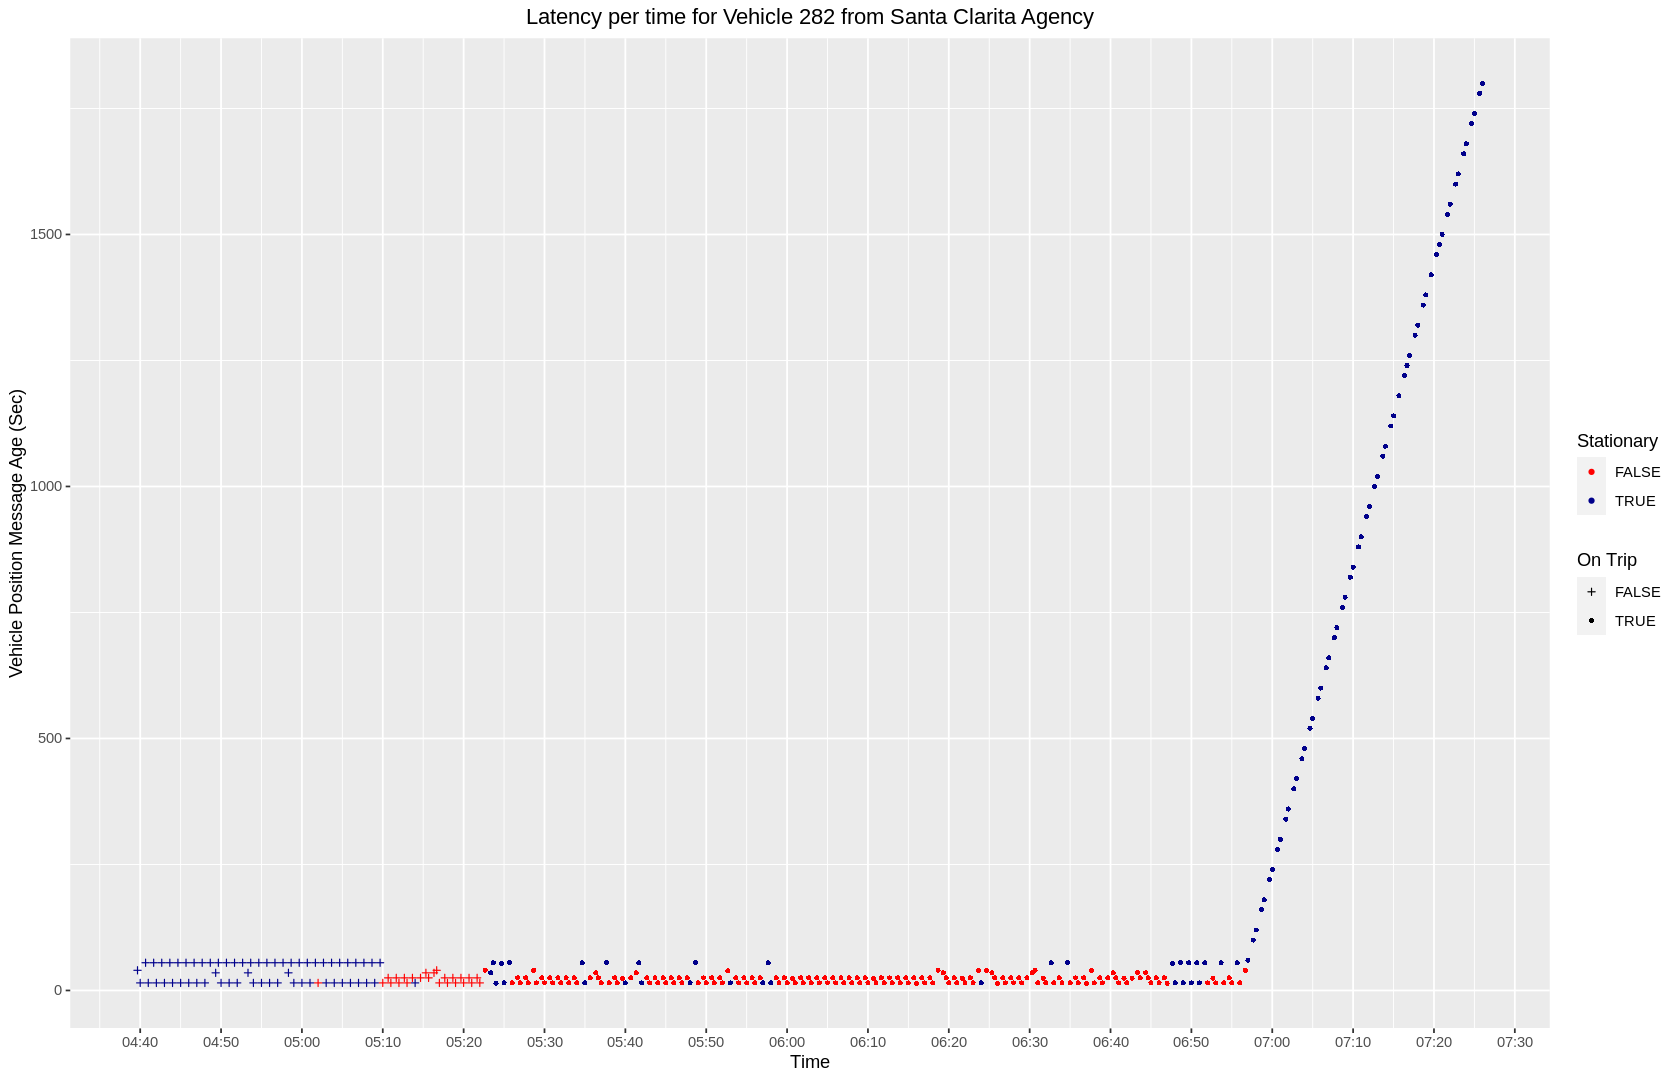

In [147]:
santaClaritaDistinct %>% 
    # filter(Agency == "Santa Clarita VehiclePositions",
    #        Vendor == "Connexionz Inc.",
    #        vehicle_label == "282") %>%
    arrange(desc(extract_ts_pasific)) %>% 
    mutate(`On Trip` = !is.na(trip_id),
           location = position_latitude + position_longitude, 
           location1 = lead(location, default = last(location)),
           Stationary = location == location1) %>% 
    ggplot(aes(extract_ts_pasific, VPLatency)) +
    geom_point(size = 1.1, aes(color = Stationary, shape = `On Trip`)) +
    xlab("Time") +
    ylab("Vehicle Position Message Age (Sec)") +
    ggtitle("Latency per time for Vehicle 282 from Santa Clarita Agency") +
    theme(plot.title = element_text(hjust = 0.5)) +
    scale_color_manual(values = c("red", "darkblue")) +
    scale_shape_manual(values = c(3, 16)) +
    scale_x_datetime( breaks = date_breaks("10 min"), 
                    labels = date_format("%H:%M", 
                                         # tz="CET"
                                        ), 
                    # expand = c(0,0)
                    )



In [141]:
santaClaritaDistinct$VPLatency %>% 
    summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   14.0    15.0    25.0   187.3    55.0  1800.0 

In [148]:
Report10272 %>% 
    filter(Agency == "Santa Clarita VehiclePositions",
           Vendor == "Connexionz Inc.",
           vehicle_label == "282") %>%
    pull(VPLatency) %>% 
    summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   14.0    24.0    35.0   191.8    55.0  1820.0 